<a href="https://colab.research.google.com/github/ousabu/aiousama/blob/master/bike_sharing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd


In [2]:
df=pd.read_csv("train.csv")

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
df.datetime=pd.to_datetime(df.datetime)

In [26]:
df['year'] = df['datetime'].dt.year 
df['month'] = df['datetime'].dt.month 
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['minute'] = df['datetime'].dt.minute
df['second'] = df['datetime'].dt.second

In [27]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,year,month,day,hour,second,minute
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,2011,1,1,4,0,0


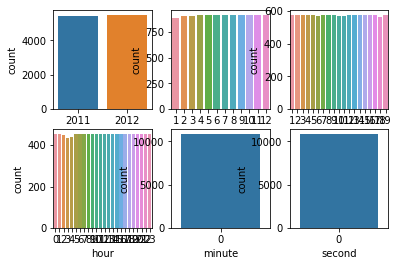

In [28]:
from matplotlib import pyplot as plt
import seaborn as sns

ax1 = plt.subplot(2, 3, 1)
sns.countplot(x='year', data=df)

ax2 = plt.subplot(2, 3, 2)
sns.countplot(x='month', data=df)

ax3 = plt.subplot(2, 3, 3)
sns.countplot(x='day', data=df)

ax4 = plt.subplot(2, 3, 4)
sns.countplot(x='hour', data=df)

ax5 = plt.subplot(2, 3, 5)
sns.countplot(x='minute', data=df)

ax6 = plt.subplot(2, 3, 6)
sns.countplot(x='second', data=df)

plt.show()


In [39]:

X = df[['month', 'day', 'hour', 'season', 'holiday', 'workingday', 'weather', 'temp',
          'atemp', 'humidity', 'windspeed']].values
y = df['count'].values

type(X), type(y)
X.shape, y.shape

((10886, 11), (10886,))

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8708, 11) (8708,)
(2178, 11) (2178,)


In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
predictions = model.predict(X_test)
predictions


from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions)
print(mse)

rmse = mean_squared_error(y_test, predictions, squared = False)
print(rmse)

21648.70612510245
147.1349928640446


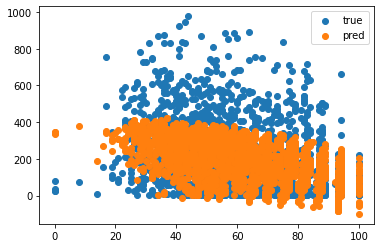

In [46]:
#습도
plt.scatter(X_test[:,9], y_test, label="true")
plt.scatter(X_test[:,9], predictions, label="pred")
plt.legend()
plt.show()

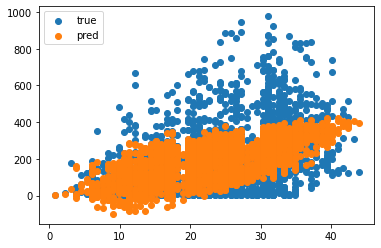

In [47]:
#온도 
plt.scatter(X_test[:,8], y_test, label="true")
plt.scatter(X_test[:,8], predictions, label="pred")
plt.legend()
plt.show()